# Clustering on Crime data

## Hierarchical Clustering

In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
def stnd_fun(i):
    x= (i-i.mean())/(i.std())
    return (x)
    

In [5]:
stnd_crime_fun=stnd_fun(df.iloc[:,1:])

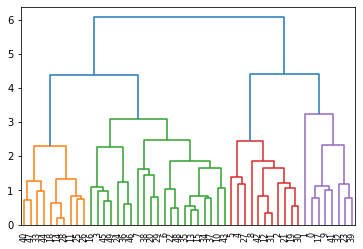

In [6]:
dendrogram = sch.dendrogram(sch.linkage(stnd_crime_fun,method='complete'))

In [7]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [8]:
hc_y = hc.fit_predict(stnd_crime_fun)
hc_y

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [9]:
df['clusterid']= pd.Series(hc_y)
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [10]:
result_hierarchical = df.iloc[:,1:].groupby(df.clusterid).mean()
result_hierarchical

,Murder,Assault,UrbanPop,Rape,clusterid
clusterid,,,,,
0,14.087500,252.750000,53.500000,24.537500,0
1,5.871429,134.476190,70.761905,18.580952,1
2,11.054545,264.090909,79.090909,32.618182,2
3,3.180000,78.700000,49.300000,11.630000,3


## K_Mean Clustering

In [11]:
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist

In [12]:
df2=pd.read_csv("crime_data.csv")
df2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [14]:
def nor_fun(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [15]:
k_norm_crime=nor_fun(df2.iloc[:,1:])
k_norm_crime

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [16]:
kmeans_cluster_crime= KMeans(n_clusters=4)
kmeans_cluster_crime.fit(k_norm_crime)

KMeans(n_clusters=4)

In [17]:
kmeans_cluster_crime.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [18]:
kmeans_cluster_crime.cluster_centers_.shape

(4, 4)

In [19]:
df2['clusterID'] = pd.Series(kmeans_cluster_crime.labels_)
result_kmean = df2.iloc[:,1:].groupby(df2.clusterID).mean()
result_kmean

,Murder,Assault,UrbanPop,Rape,clusterID
clusterID,,,,,
0,5.852941,141.176471,73.647059,19.335294,0
1,13.937500,243.625000,53.750000,21.412500,1
2,3.600000,78.538462,52.076923,12.176923,2
3,10.966667,264.000000,76.500000,33.608333,3


In [20]:
k= list(range(2,14))
k
TWSS = []
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(k_norm_crime)
    WSS = []
    for j in range(i):
        WSS.append(sum(cdist(k_norm_crime.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,k_norm_crime.shape[1]),"euclidean")))
    
    print("TWSS when k is",i,sum(WSS))
    TWSS.append(sum(WSS))

TWSS when k is 2 [16.96661211]
TWSS when k is 3 [14.59566832]
TWSS when k is 4 [12.72623173]
TWSS when k is 5 [11.74757369]
TWSS when k is 6 [11.25986169]
TWSS when k is 7 [10.54727888]
TWSS when k is 8 [10.0860487]
TWSS when k is 9 [9.50956211]
TWSS when k is 10 [9.10732838]
TWSS when k is 11 [8.57777093]
TWSS when k is 12 [8.11640573]
TWSS when k is 13 [7.87257493]


<function matplotlib.pyplot.show(close=None, block=None)>

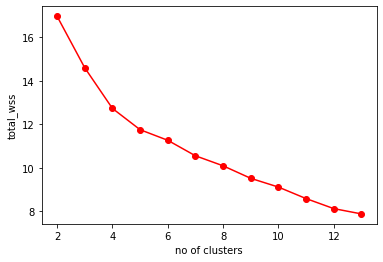

In [21]:
plt.plot(k,TWSS,'ro-')
plt.xlabel("no of clusters")
plt.ylabel("total_wss")
plt.show

# DBSCAN Clustering

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
df3 = pd.read_csv("crime_data.csv")
df3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [24]:
df3 = stnd_fun(df3.iloc[:,1:])
df3

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820
5,0.025715,0.398859,0.860809,1.864967
6,-1.030419,-0.729082,0.791723,-1.081741
7,-0.433474,0.806838,0.446294,-0.579946
8,1.747671,1.970778,0.998980,1.138967
9,2.206860,0.482855,-0.382735,0.487702


In [25]:
dbscan = DBSCAN(eps=1.5,min_samples=10)
dbscan.fit(df3)

DBSCAN(eps=1.5, min_samples=10)

In [26]:
pd.Series(dbscan.labels_).value_counts()

 0    44
-1     6
dtype: int64

In [27]:
df3['clusterID']= pd.DataFrame(dbscan.labels_)
df3

,Murder,Assault,UrbanPop,Rape,clusterID
0,1.242564,0.782839,-0.520907,-0.003416,0
1,0.507862,1.106823,-1.211764,2.484203,-1
2,0.071633,1.478803,0.998980,1.042878,0
3,0.232349,0.230868,-1.073593,-0.184917,0
4,0.278268,1.262814,1.758923,2.067820,-1
5,0.025715,0.398859,0.860809,1.864967,0
6,-1.030419,-0.729082,0.791723,-1.081741,0
7,-0.433474,0.806838,0.446294,-0.579946,0
8,1.747671,1.970778,0.998980,1.138967,0
9,2.206860,0.482855,-0.382735,0.487702,-1


# Clustering on Airlines Data


As the data set of airlines is huge, it is advisable to not use hierarchical clustering

## K-Mean Clustering

In [28]:
data = pd.read_csv('EastWestAirlines.csv')
data


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [29]:
data_norm = nor_fun(data.iloc[:,1:])   # using the previous function defined 
data_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [30]:
kmean_nh = KMeans(n_clusters=5)
kmean_nh.fit(data_norm)
kmean_nh

KMeans(n_clusters=5)

In [31]:
kmean_nh.labels_

array([3, 3, 3, ..., 1, 0, 0])

In [32]:
kmean_nh.cluster_centers_

array([[ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01,  3.94129174e-15],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01,  1.16573418e-15],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
  

In [33]:
data['clusterID']= pd.Series(kmean_nh.labels_)
group = data.iloc[:,1:].groupby(data.clusterID).mean()
group

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterID
clusterID,,,,,,,,,,,,
0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,0
1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,1
2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,2
3,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,3
4,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,4


In [34]:
k= list(range(2,12))
k
TWSS=[]
for i in k:
    Kmeans = KMeans(n_clusters=i)
    Kmeans= Kmeans.fit(data_norm)
    WSS=[]
    for j in range (i):
        WSS.append(sum(cdist(data_norm.iloc[Kmeans.labels_==j,:],Kmeans.cluster_centers_[j].reshape(1,data_norm.shape[1]),'euclidean')))
        
        
    print(" TWSS when k is",i,sum(WSS))
    TWSS.append(sum(WSS))
    

 TWSS when k is 2 [1657.66572161]
 TWSS when k is 3 [1391.70457482]
 TWSS when k is 4 [1170.17593612]
 TWSS when k is 5 [1002.45329086]
 TWSS when k is 6 [954.76858447]
 TWSS when k is 7 [908.5110452]
 TWSS when k is 8 [865.87234308]
 TWSS when k is 9 [834.9176344]
 TWSS when k is 10 [787.5209987]
 TWSS when k is 11 [760.17999944]


<function matplotlib.pyplot.show(close=None, block=None)>

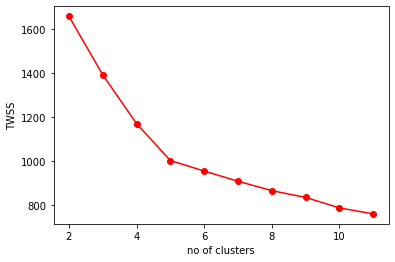

In [35]:
plt.plot(k,TWSS,'ro-')
plt.xlabel('no of clusters')
plt.ylabel('TWSS')
plt.show

## DBSCAN 

In [36]:
data2= pd.read_csv("EastWestAirlines.csv")
data2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [37]:
dbscan2 = DBSCAN(eps=1.8,min_samples=42)
dbscan2.fit(data2)

DBSCAN(eps=1.8, min_samples=42)

In [38]:
pd.Series(dbscan2.labels_).value_counts()

-1    3999
dtype: int64

In [39]:
data['clusterID']=pd.DataFrame(dbscan2.labels_)
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,-1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,-1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,-1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,-1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,-1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,-1
